<a href="https://colab.research.google.com/github/KazGet/Theory-of-random-processes/blob/main/Lab3_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import log, exp
from scipy.stats import norm

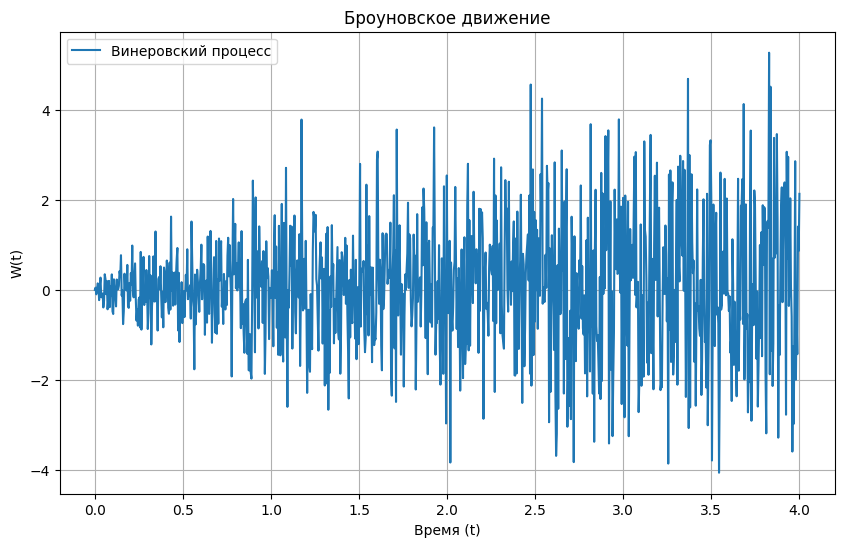

In [ ]:
values = np.random.normal(0, 1, 1000)
T=4
h=4e-3
n=int(T/h) #Количество шагов
t=np.linspace(0, T, n)
W = np.sqrt(t)*values

plt.figure(figsize=(10, 6))
plt.plot(t, W, label = "Винеровский процесс")
plt.title("Броуновское движение")
plt.xlabel("Время (t)")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

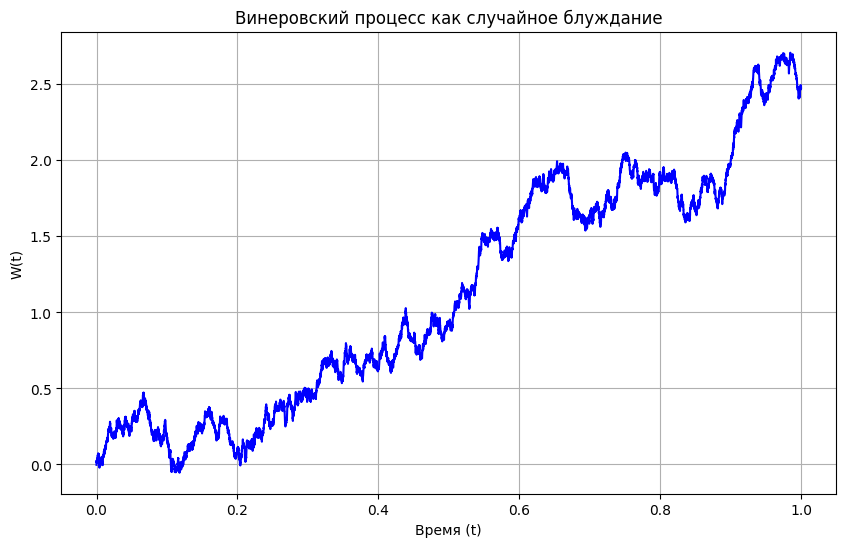

In [ ]:
N = 10**4
T = 1
t = np.linspace(0, T, N)
Wt = np.cumsum(np.random.randn(N)) / np.sqrt(N)


plt.figure(figsize=(10, 6))
for i in range(1, N+1):
  if i==10000:
    plt.plot(t[:i], Wt[:i], color='b')
    plt.xlabel('Время (t)')
    plt.ylabel('W(t)')
    plt.title('Винеровский процесс как случайное блуждание')
    plt.grid(True)
    plt.pause(0.001)
    if i < N:
        plt.clf()

plt.show()

Вторая производная функции:  -2.25000000000000e-8
Оптимальный n кратный 8:  16


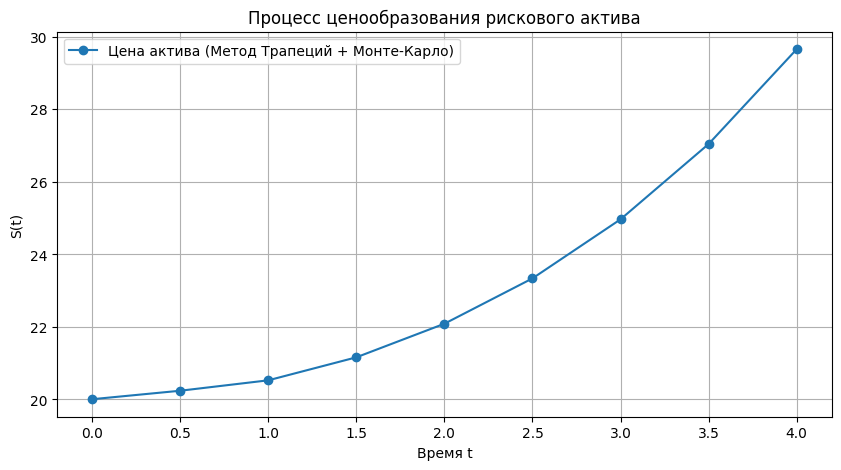

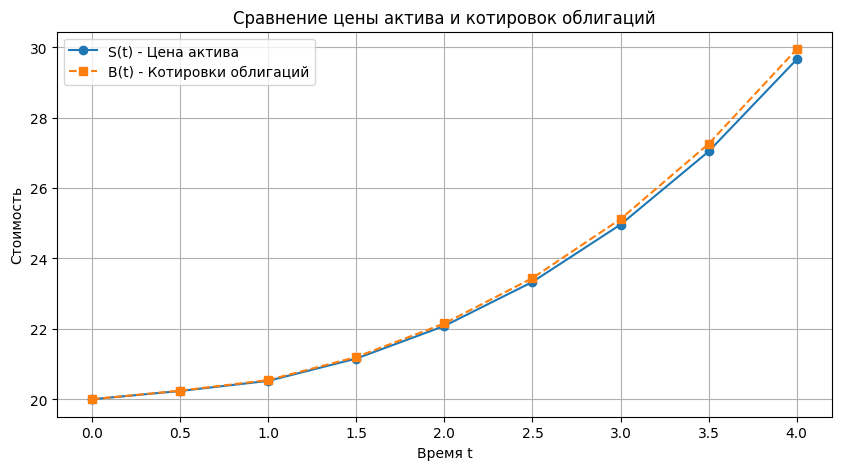

Результаты вычислений:
t (годы)   Число разбиений n    Число итераций N     Ошибка          S(t)            B(t)
----------------------------------------------------------------------------------------------------
0.0        0                    0                    0.000000        20.000000       20.000000
0.5        2                    6250                 0.005859        20.234057       20.243660
1.0        10                   12500                0.001875        20.521416       20.544788
1.5        18                   18750                0.001953        21.155715       21.198605
2.0        26                   25000                0.002220        22.081941       22.152519
2.5        34                   31250                0.002536        23.332436       23.441703
3.0        42                   37500                0.002871        24.961297       25.118438
3.5        50                   43750                0.003216        27.038028       27.253935
4.0        58             

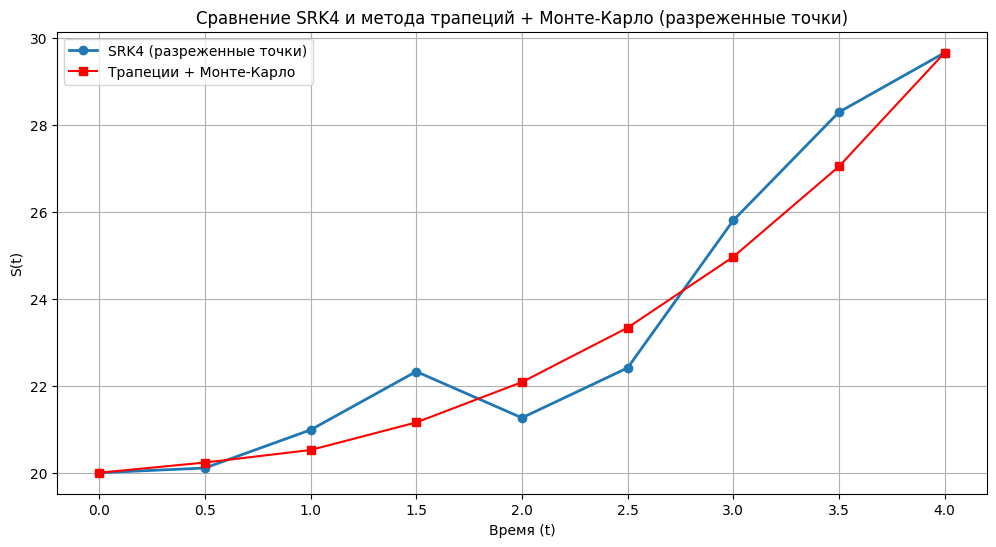

In [ ]:
np.random.seed(3)

S0 = 20
b = 4
a = 0
epsilon = 0.01
sigma = lambda x: (1.5 * x + 4) / 100
mu = lambda x: 0.05 * x
func = lambda t: mu(t) - (sigma(t) ** 2) / 2
t_list = np.linspace(a, b, num=9)
integral_trap = []
error_list = [0]
total_error = []
integral_monte = []
S = []
B_t = []
N_iteration = []
n_list = [0]
N_total = 50000  # Общее число итераций


# Rn(f) = max|f"(x)|*(b-a)h^2/12; Rn(f)<e; h=(b-a)/n; n=(b-a)/h
# Вторая производная
t = sp.Symbol('t')
f = mu(t)-0.5*(sigma(t)/100)**2
f_second_derivative = sp.diff(f, t, 2)  # Вторая производная
print("Вторая производная функции: ", f_second_derivative)



def n_optimal(b, a, deriviative):
    # Вычисляем такой n, чтобы ошибка удовлетворяла условию Rn<epsilon
    for i in range(1, 1000):
        h = (b - a) / i
        Rn = np.max(abs(deriviative)) * ((b - a) * h ** 2) / 12
        if Rn < epsilon:
            n = i
            h = (b - a) / n
            break
    # n_optimal: n%8=0
    for i in range(1, 1000):
        if n % 8 != 0:
            n += 1
        elif n==8:
            n+=8
        else:
            break
    print("Оптимальный n кратный 8: ", n)
    return n


# МЕТОД ТРАПЕЦИЙ
def trapz(t_list, N, f):
    for i, j in enumerate(t_list):
        if i == 0:  # Интеграл = 0, если a=b=0
            integral_trap.append(0) if f == func else B_t.append(20)
        else:
            n = int(N / 8 + 8 * (i - 1))
            h = (j - a) / n
            t_values = np.linspace(a, j, n + 1)
            Rn = 2.25 * ((j - 0) * h ** 2) / 12
            integral = (f(0) + f(j)) / 2 + (np.sum(f(t_values[1:n])))
            if f == func:
                integral_trap.append(h * integral + Rn)
                error_list.append(Rn)
                n_list.append(n)
            else:  # Для котировок облигаций
                B_t.append(S0 * np.exp(h * integral + Rn))
    return integral_trap if f != mu else B_t


# МЕТОД МОНТЕ-КАРЛО
def monte_carlo_integral(t_list, N_total):
    for i, j in enumerate(t_list):
        if i == 0:  # Интеграл = 0, если a=b=0
            N_iteration.append(0)
            error_list.append(0)
            integral_monte.append(0)
        else:
            N = int((i) / 8 * N_total)
            N_iteration.append(N)
            X_k = t_list[i] * np.random.normal(0, 1, N)  # Равномерное распределение
            W_j = np.sqrt(t_list[i]) * np.random.normal(0, 1, N)  # Стохастическая часть
            integral = np.sum(sigma(X_k) * W_j) / N_total
            integral_monte.append(integral)
            error_mc = np.abs(integral) / np.sqrt(N)
            error_list.append(error_mc)
    return integral_monte


def stochastic_integration():
    n = n_optimal(b, a, f_second_derivative)
    t = trapz(t_list, n, func)
    B = trapz(t_list, n, mu)
    total_error = error_list.copy()
    error_list.clear()
    m = monte_carlo_integral(t_list, N_total)
    total_error = [i + j for i, j in zip(total_error, error_list)]
    for i in range(len(t_list)):
        S_combined = S0 * np.exp(t[i] + m[i])
        S.append(S_combined)
    return S, B, total_error


S, B, total_error = stochastic_integration()

plt.figure(figsize=(10, 5))
plt.plot(t_list, S, marker='o', linestyle='-', label="Цена актива (Метод Трапеций + Монте-Карло)")
plt.xlabel("Время t")
plt.ylabel("S(t)")
plt.title("Процесс ценообразования рискового актива")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_list, S, marker='o', linestyle='-', label="S(t) - Цена актива")
plt.plot(t_list, B, marker='s', linestyle='--', label="B(t) - Котировки облигаций")
plt.xlabel("Время t")
plt.ylabel("Стоимость")
plt.title("Сравнение цены актива и котировок облигаций")
plt.legend()
plt.grid()
plt.show()

print("Результаты вычислений:")
print(f"{'t (годы)':<10} {'Число разбиений n':<20} {'Число итераций N':<20} {'Ошибка':<15} {'S(t)':<15} {'B(t)'}")
print("-" * 100)
for i, t in enumerate(t_list):
    print(f"{t:<10.1f} {n_list[i]:<20} {N_iteration[i]:<20} {total_error[i]:<15.6f} {S[i]:<15.6f} {B_t[i]:.6f}")


def mu(S, t):
    return 0.05 * t * S

def sigma(S, t):
    return (1.5*t + 4) / 100 * S

T = 4.0         # Конечное время
N = 80000       # Количество шагов
dt = T / N      # Размер шага

# Стохастический метод Рунге-Кутта 4-го порядка (SRK4)
def srk4(f, g, y0, t):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n - 1):
        h = t[i+1] - t[i]
        current_t, current_y = t[i], y[i]

        Z = np.random.normal(0, 1)

        k1 = f(current_y, current_t) * h + g(current_y, current_t) * np.sqrt(h) * Z
        k2 = f(current_y + k1/2, current_t + h/2) * h + g(current_y + k1/2, current_t + h/2) * np.sqrt(h) * Z
        k3 = f(current_y + k2/2, current_t + h/2) * h + g(current_y + k2/2, current_t + h/2) * np.sqrt(h) * Z
        k4 = f(current_y + k3, current_t + h) * h + g(current_y + k3, current_t + h) * np.sqrt(h) * Z

        y[i+1] = current_y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return y

t_values = np.linspace(0, T, N+1)

# Решение SRK4
S_srk4 = srk4(mu, sigma, S0, t_values)

indices = np.arange(0, N+1, 10000)
t_sampled = t_values[indices]
S_srk4_sampled = S_srk4[indices]

t_prev = np.linspace(0, 4, 9)
S_srk4_interp = np.interp(t_prev, t_values, S_srk4)

errors = np.abs(S_srk4_interp - S)
relative_errors = (errors / S * 100)

plt.figure(figsize=(12, 6))
plt.plot(t_sampled, S_srk4_sampled, marker='o', linestyle='-', label="SRK4 (разреженные точки)", linewidth=2)
plt.plot(t_prev, S, marker='s', linestyle='-', color='red', label="Трапеции + Монте-Карло")

plt.xlabel("Время (t)")
plt.ylabel("S(t)")
plt.title("Сравнение SRK4 и метода трапеций + Монте-Карло (разреженные точки)")
plt.legend()
plt.grid(True)


# Вывод результатов сравнения
print("\nСравнение решений:")
print(f"{'t':<5} {'SRK4':<20} {'Трапеции+МК':<20} {'Абс. ошибка':<15} {'Отн. ошибка (%)'}")
print("-" * 80)
for i in range(len(t_prev)):
    print(f"{t_prev[i]:<5} {S_srk4_interp[i]:<20.6f} {S[i]:<20.6f} {errors[i]:<15.6f} {relative_errors[i]:.2f}%")
plt.show()

In [ ]:
print(S)

[np.float64(20.0), np.float64(20.234056937947788), np.float64(20.521416157571416), np.float64(21.15571508690359), np.float64(22.08194064066561), np.float64(23.332436046261414), np.float64(24.961297328822614), np.float64(27.03802793729878), np.float64(29.652187766418518)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import log, exp, pi
from scipy.stats import norm

In [ ]:

E = 8 / 7 * 20
r = 0.1
h = 0.004
sigma = lambda x: (1.5 * x + 4) / 100
# sigma = lambda t: t**(3/2)/100
mu = lambda x: 0.05 * x
# sigma = lambda x: (6+2*x) / 100


T = 4
tao = 3
t = 1
# Для t=1 -> S2=[0,1]
S1 = S[2]
d1 = (log(S1 / E) + (r + 0.5 * sigma(t)**2) * tao) / ((tao  0.5) * sigma(t))
# d2 = (log(S1)-log(E)+(r-0.5*sigma(t)2)*tao)/((tao**0.5)*sigma(t))
print("d1: ", d1)
d2 = d1 - sigma(t) * (tao  0.5)
print("d2: ", d2)

> Nikita:
C_t = S1 * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
print("Ct: ", C_t)
print("E: ", E)

delta = []


def delta_calc(t_list, S, r, T):
    for i in range(len(t_list)):
        if (T-t_list[i])!=0:
            delta.append(norm.cdf((log(S[i] / E) + (r + 0.5 * sigma(t_list[i])  2) * (T - t_list[i])) / (
                        ((T - t_list[i])  0.5) * sigma(t_list[i]))))
        else:
            delta.append(1) if S[i]>E else delta.append(0)
    return delta


delta_c = delta_calc(t_list, S, r, T)
for i, j in enumerate(delta_c):
    print(i, j)
print('\n')

plt.figure(figsize=(10, 5))
plt.plot(t_list, delta_c, marker='o', linestyle='-', label="Дельта Ф(d1)")
plt.xlabel("Время t")
plt.ylabel("Дельта")
plt.legend()
plt.grid()


# plt.show()


def big_teta(t_list, S, r, T):
    teta = []
    for i in range(len(t_list)):
        tao = T - t_list[i]
        if tao!=0:
            d1 = (log(S[i] / E) + (r + 0.5 * sigma(t_list[i])  2) * tao) / ((tao  0.5) * sigma(t_list[i]))
            d2 = d1 - (sigma(t_list[i]) * (tao  0.5))
            temp=-sigma(t_list[i]) * S[i] * norm.pdf(d1) / (2 * ((2 * pi)  0.5) * (tao  0.5))
            temp+=E * r * exp(-r * tao) * norm.cdf(-d2)
            teta.append(temp)
            # teta.append(- (sigma(t_list[i]) * S[i] / (2 * np.sqrt(tao))) * norm.pdf(d1) + r * E * np.exp(-r * tao) * norm.cdf(-d2))

        else:
            teta.append(0)
    return teta


teta_arr = big_teta(t_list, S, r, T)
for i, j in enumerate(teta_arr):
    print(i, j)

plt.figure(figsize=(10, 5))
plt.plot(t_list, teta_arr, marker='o', linestyle='-')
plt.xlabel("Время t")
plt.ylabel("Тета")
plt.grid()
# plt.show()

def calcX_t(t_list):
    X=[]
    for i in range(len(t_list)):
        tao = T - t_list[i]
        if tao!=0:
            delta = norm.cdf((log(S[i] / E) + (r + 0.5 * sigma(t_list[i])  2) * tao) / (
                        (tao  0.5) * sigma(t_list[i])))
            d1 = (log(S[i] / E) + (r + 0.5 * sigma(t_list[i])  2) * tao) / ((tao  0.5) * sigma(t_list[i]))
            d2 = d1 - (sigma(t_list[i]) * (tao  0.5))
            Ct = S[i] * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
            X.append(-Ct+S[i]*delta)
        else:
            delta = 1
            F_d1 = 1 if log(S[i])>log(E) else 0
            F_d2 = F_d1
            Ct = S[i] * F_d1 - E * exp(-r * tao) * F_d2
            X.append(-Ct + S[i] * delta)
    return X

print("\nФинансовый портфель: ")
for i, j in enumerate(calcX_t(t_list)):
    print(f"{i}:  {j}")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-17-b154c75ad583>, line 15)